In [11]:
%matplotlib inline
import pickle
import numpy
import pandas
import matplotlib.pyplot as plt
import sys
sys.path.append("./tools/")
from feature_format import featureFormat, targetFeatureSplit

In [35]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g", "y", "n", "o"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [37]:
### load in the dict of dicts containing all the data on each person in the dataset
finance_data = pandas.read_pickle("final_project_dataset.pkl")
### there's an outlier--remove it! 
finance_data.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [32]:
#finance_data.items()
pandas.DataFrame.from_dict(finance_data, orient='columns', dtype=None)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


In [93]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, max_iter=300, random_state=42)
clusterer.fit(finance_features, poi)
pred = clusterer.predict(finance_features)
print pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


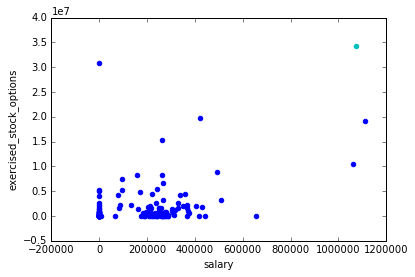

In [95]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [96]:
ex_stok = []
for users in data_dict:
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    ex_stok.append(val)
print "Maximum exercised_stock_options: {}".format(max(ex_stok))
print "Minimum exercised_stock_options: {}".format(min(ex_stok))

Maximum exercised_stock_options: 34348384
Minimum exercised_stock_options: 3285


In [90]:
ex_stok = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    ex_stok.append(val)
print "Maximum salary: {}".format(max(ex_stok))
print "Minimum salary: {}".format(min(ex_stok))

Maximum salary: 1111258
Minimum salary: 477
